In [1]:
#trilateration using Machine Learning
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#run the ML algorithm to get the distance values along with the locations
points = [(5.5,0),(16.5,0),(0,11)]
distance = [5,11,10]

In [3]:
import math

PRECISION = 5  # Decimal point precision


class Circle(object):
    """ An OOP implementation of a circle as an object """

    def __init__(self, xposition, yposition, radius):
        self.xpos = xposition
        self.ypos = yposition
        self.radius = radius
        
#     def nopoint(X1,X2,Y1,Y2,R1,R2):
#         m = (Y2-Y1)/(X2-X1)
#         r = math.sqrt(1-(m**2))
#         I1 = X1 + R1/r, Y1 + (R1*m/r)
#         I2 = X2 + R2/r, Y2 + (R2*m/r)
#         return I1,I2
    
    def circle_intersect(self, circle2):
        """
        Intersection points of two circles using the construction of triangles
        as proposed by Paul Bourke, 1997.
        http://paulbourke.net/geometry/circlesphere/
        """
        X1, Y1 = self.xpos, self.ypos
        X2, Y2 = circle2.xpos, circle2.ypos
        R1, R2 = self.radius, circle2.radius

        Dx = X2-X1
        Dy = Y2-Y1
        Dxx = Dx
        Dyy = Dy
        if Dx == 0:
            Dxx = 0.00001
        elif Dy == 0:
            Dyy = 0.00001
        else :
            Dxx = Dx
            Dyy = Dy
        D = round(math.sqrt(Dx**2 + Dy**2), PRECISION)
        m = Dy/Dx
        r = math.sqrt(1+(m**2))
        I1 = X1 + R1/r, Y1 + (R1*m/r)
        I2 = X2 + R2/r, Y2 + (R2*m/r)
        # Distance between circle centres
        if D > R1 + R2:
#             I1,I2 = nopoint(X1,X2,Y1,Y2,R1,R2)
            CASE =  "The circles do not intersect"
        elif D < math.fabs(R2 - R1):
#             I1,I2 = nopoint(X1,X2,Y1,Y2,R1,R2)
            CASE =  "No Intersect - One circle is contained within the other"

        elif D == 0 and R1 == R2:
#             I1,I2 = nopoint(X1,X2,Y1,Y2,R1,R2)
            CASE =  "No Intersect - The circles are equal and coincident"
            
        else:
            if D == R1 + R2 or D == R1 - R2:
                CASE = "The circles intersect at a single point"
            else:
                CASE = "The circles intersect at two points"
            chorddistance = (R1**2 - R2**2 + D**2)/(2*D)
            # distance from 1st circle's centre to the chord between intersects
            halfchordlength = math.sqrt(R1**2 - chorddistance**2)
            chordmidpointx = X1 + (chorddistance*Dx)/D
            chordmidpointy = Y1 + (chorddistance*Dy)/D
            I1 = (round(chordmidpointx + (halfchordlength*Dy)/D, PRECISION),
                  round(chordmidpointy - (halfchordlength*Dx)/D, PRECISION))
            theta1 = round(math.degrees(math.atan2(I1[1]-Y1, I1[0]-X1)),
                           PRECISION)
            I2 = (round(chordmidpointx - (halfchordlength*Dy)/D, PRECISION),
                  round(chordmidpointy + (halfchordlength*Dx)/D, PRECISION))
            theta2 = round(math.degrees(math.atan2(I2[1]-Y1, I2[0]-X1)),
                           PRECISION)
            if theta2 > theta1:
                I1, I2 = I2, I1
        return (I1, I2)


In [4]:
# C1 = Circle(0, 5.5, 9.5)
# C2 = Circle(0.1,16.5, 8)
# C1.circle_intersect(C2)


In [5]:
# C1 = Circle(0, 5.5, 9.5)
# C2 = Circle(0.1,16.5, 8)
# C1.circle_intersect(C2)

In [6]:
# C1 = Circle(0, 0, 350)
# C2 = Circle(-130, 120, 250)

# print(C1.circle_intersect(C2))

In [7]:
i=0
intersection = []
pt = []
while i < len(points)-1:
    x,y = points[i]
    d = distance[i]
    C1 = Circle(x,y,d)
    j=i+1
    while j < len(points):
        x,y = points[j]
        d = distance[j]
        C2 = Circle(x,y,d)
        I1,I2 = C1.circle_intersect(C2)
        intersection.append(I1)
        intersection.append(I2)
        j = j+1
    i = i+1

In [8]:
# intersection

In [9]:
import pylab
axes = pylab.axes()
for i in points:
    circle = pylab.Circle(i, distance[0], alpha=.4)
    axes.add_patch(circle)

pylab.axis('scaled')

#pylab.show()


(-6.3250000000000002,
 22.824999999999999,
 -6.0499999999999998,
 17.050000000000001)

In [10]:

# circle1 = plt.Circle( color='r')
# circle2 = plt.Circle( color='blue')
# circle3 = plt.Circle( clip_on=False)

#fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

# ax.add_artist(circle1)
# ax.add_artist(circle2)
# ax.add_artist(circle3)
# plt.show()

In [11]:
# from sklearn.neighbors import NearestNeighbors
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# x = []
# y = []
# for i in X:
#     a,b = i
#     x.append(a)
#     y.append(b)
# plt.scatter(x,y)
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
# distances, indices = nbrs.kneighbors(X)
# plt.show()        

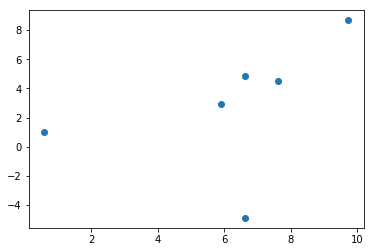

In [23]:
from sklearn.cluster import KMeans
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])
xx = []
yy = []
for i in intersection:
    a,b = i
    xx.append(a)
    yy.append(b)
plt.scatter(xx,yy)
np.random.shuffle(intersection)
kmeans = KMeans(n_clusters=4, random_state=42).fit(intersection)

plt.show()
a1 = kmeans.cluster_centers_

kmeans = KMeans(n_clusters=1, random_state=42).fit(intersection)

b = kmeans.cluster_centers_

In [13]:
from scipy.spatial import distance
euclidean = []
for i in a1:
    euclidean.append(distance.euclidean(i,b))
ind = euclidean.index(min(euclidean))
print(ind)
print(a1[ind])

1
[ 6.71806333  4.10629333]


In [14]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN()
# dbscan.fit(intersection)


# for i in range(0, pca_2d.shape[0]):
#     if dbscan.labels_[i] == 0:
#         c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
#     elif dbscan.labels_[i] == -1:
#         c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
# plt.legend([c1, c3], ['Cluster 1','Noise'])
# plt.show()

In [15]:
# dbscan = DBSCAN(min_samples = 1, eps=0.3, leaf_size=1)
# dbscan.fit(intersection)

In [16]:
# labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [17]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1).fit(intersection)
# pca_2d = pca.transform(intersection)

In [18]:
# pca_2d.shape[0]

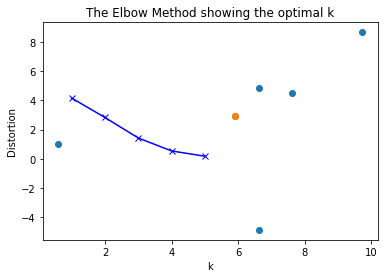

4
[ 5.89535  2.92257]


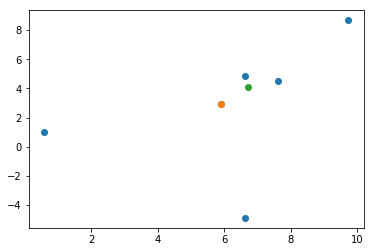

In [25]:
# k means determine k
from scipy.spatial.distance import cdist
X = np.array(intersection)
distortions = []
K = range(1,len(intersection))
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
a = kmeanModel.cluster_centers_

kmeans = KMeans(n_clusters=1, random_state=42).fit(intersection)

b = kmeans.cluster_centers_
euclidean = []
for i in a:
    euclidean.append(distance.euclidean(i,b))
ind = euclidean.index(min(euclidean))
print(ind)
print(a[ind])

plt.scatter(xx,yy)
plt.scatter(5.89535 ,2.92257)
plt.scatter(6.71806333 , 4.10629333)
plt.show()

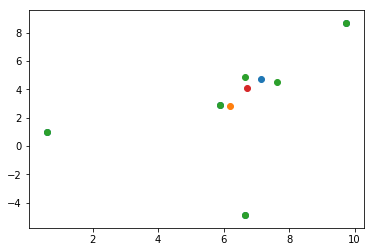

In [20]:
x = []
y = []
for i in a:
    a1,b = i
    x.append(a1)
    y.append(b)
plt.scatter(x,y)
plt.scatter(6.18647833,2.85547667)
plt.scatter(xx,yy)

plt.scatter(6.71806333,  4.10629333)

plt.show()

In [21]:
a

array([[ 5.89535 ,  2.92257 ],
       [ 9.72353 ,  8.66484 ],
       [ 6.63636 , -4.86916 ],
       [ 0.60479 ,  1.0183  ],
       [ 7.12942 ,  4.698155]])